In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/df.csv')

In [3]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [4]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [5]:
df.shape

(919288, 20)

In [6]:
df_samples = df.sample(10000)

In [7]:
# define the dataset
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name is_ninjago'.split()
target_names

fn = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    
print(fn)
X = df_samples[fn]
y = df_samples['is_ninjago']

['year', 'num_parts', 'set_num_len', 'set_name_len', 'color_id', 'quantity', 'is_trans', 'theme_name_len', 'part_num_len', 'color_name_len', 'part_name_len']


In [8]:
# define the model
model_rf = RandomForestRegressor()

# fit the model
model_rf.fit(X, y)

# get importance
importance_rf = model_rf.feature_importances_

In [9]:
# summarize feature importance
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.17100
Feature: 1, Score: 0.26515
Feature: 2, Score: 0.01184
Feature: 3, Score: 0.12207
Feature: 4, Score: 0.09360
Feature: 5, Score: 0.04496
Feature: 6, Score: 0.00321
Feature: 7, Score: 0.14707
Feature: 8, Score: 0.01903
Feature: 9, Score: 0.03504
Feature: 10, Score: 0.08703


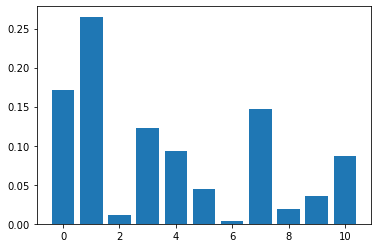

In [10]:
# plot feature importance
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()

In [11]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=11)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [12]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [13]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [14]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# evaluate the model
y_pred = model.predict(X_test_fs)

In [16]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.90


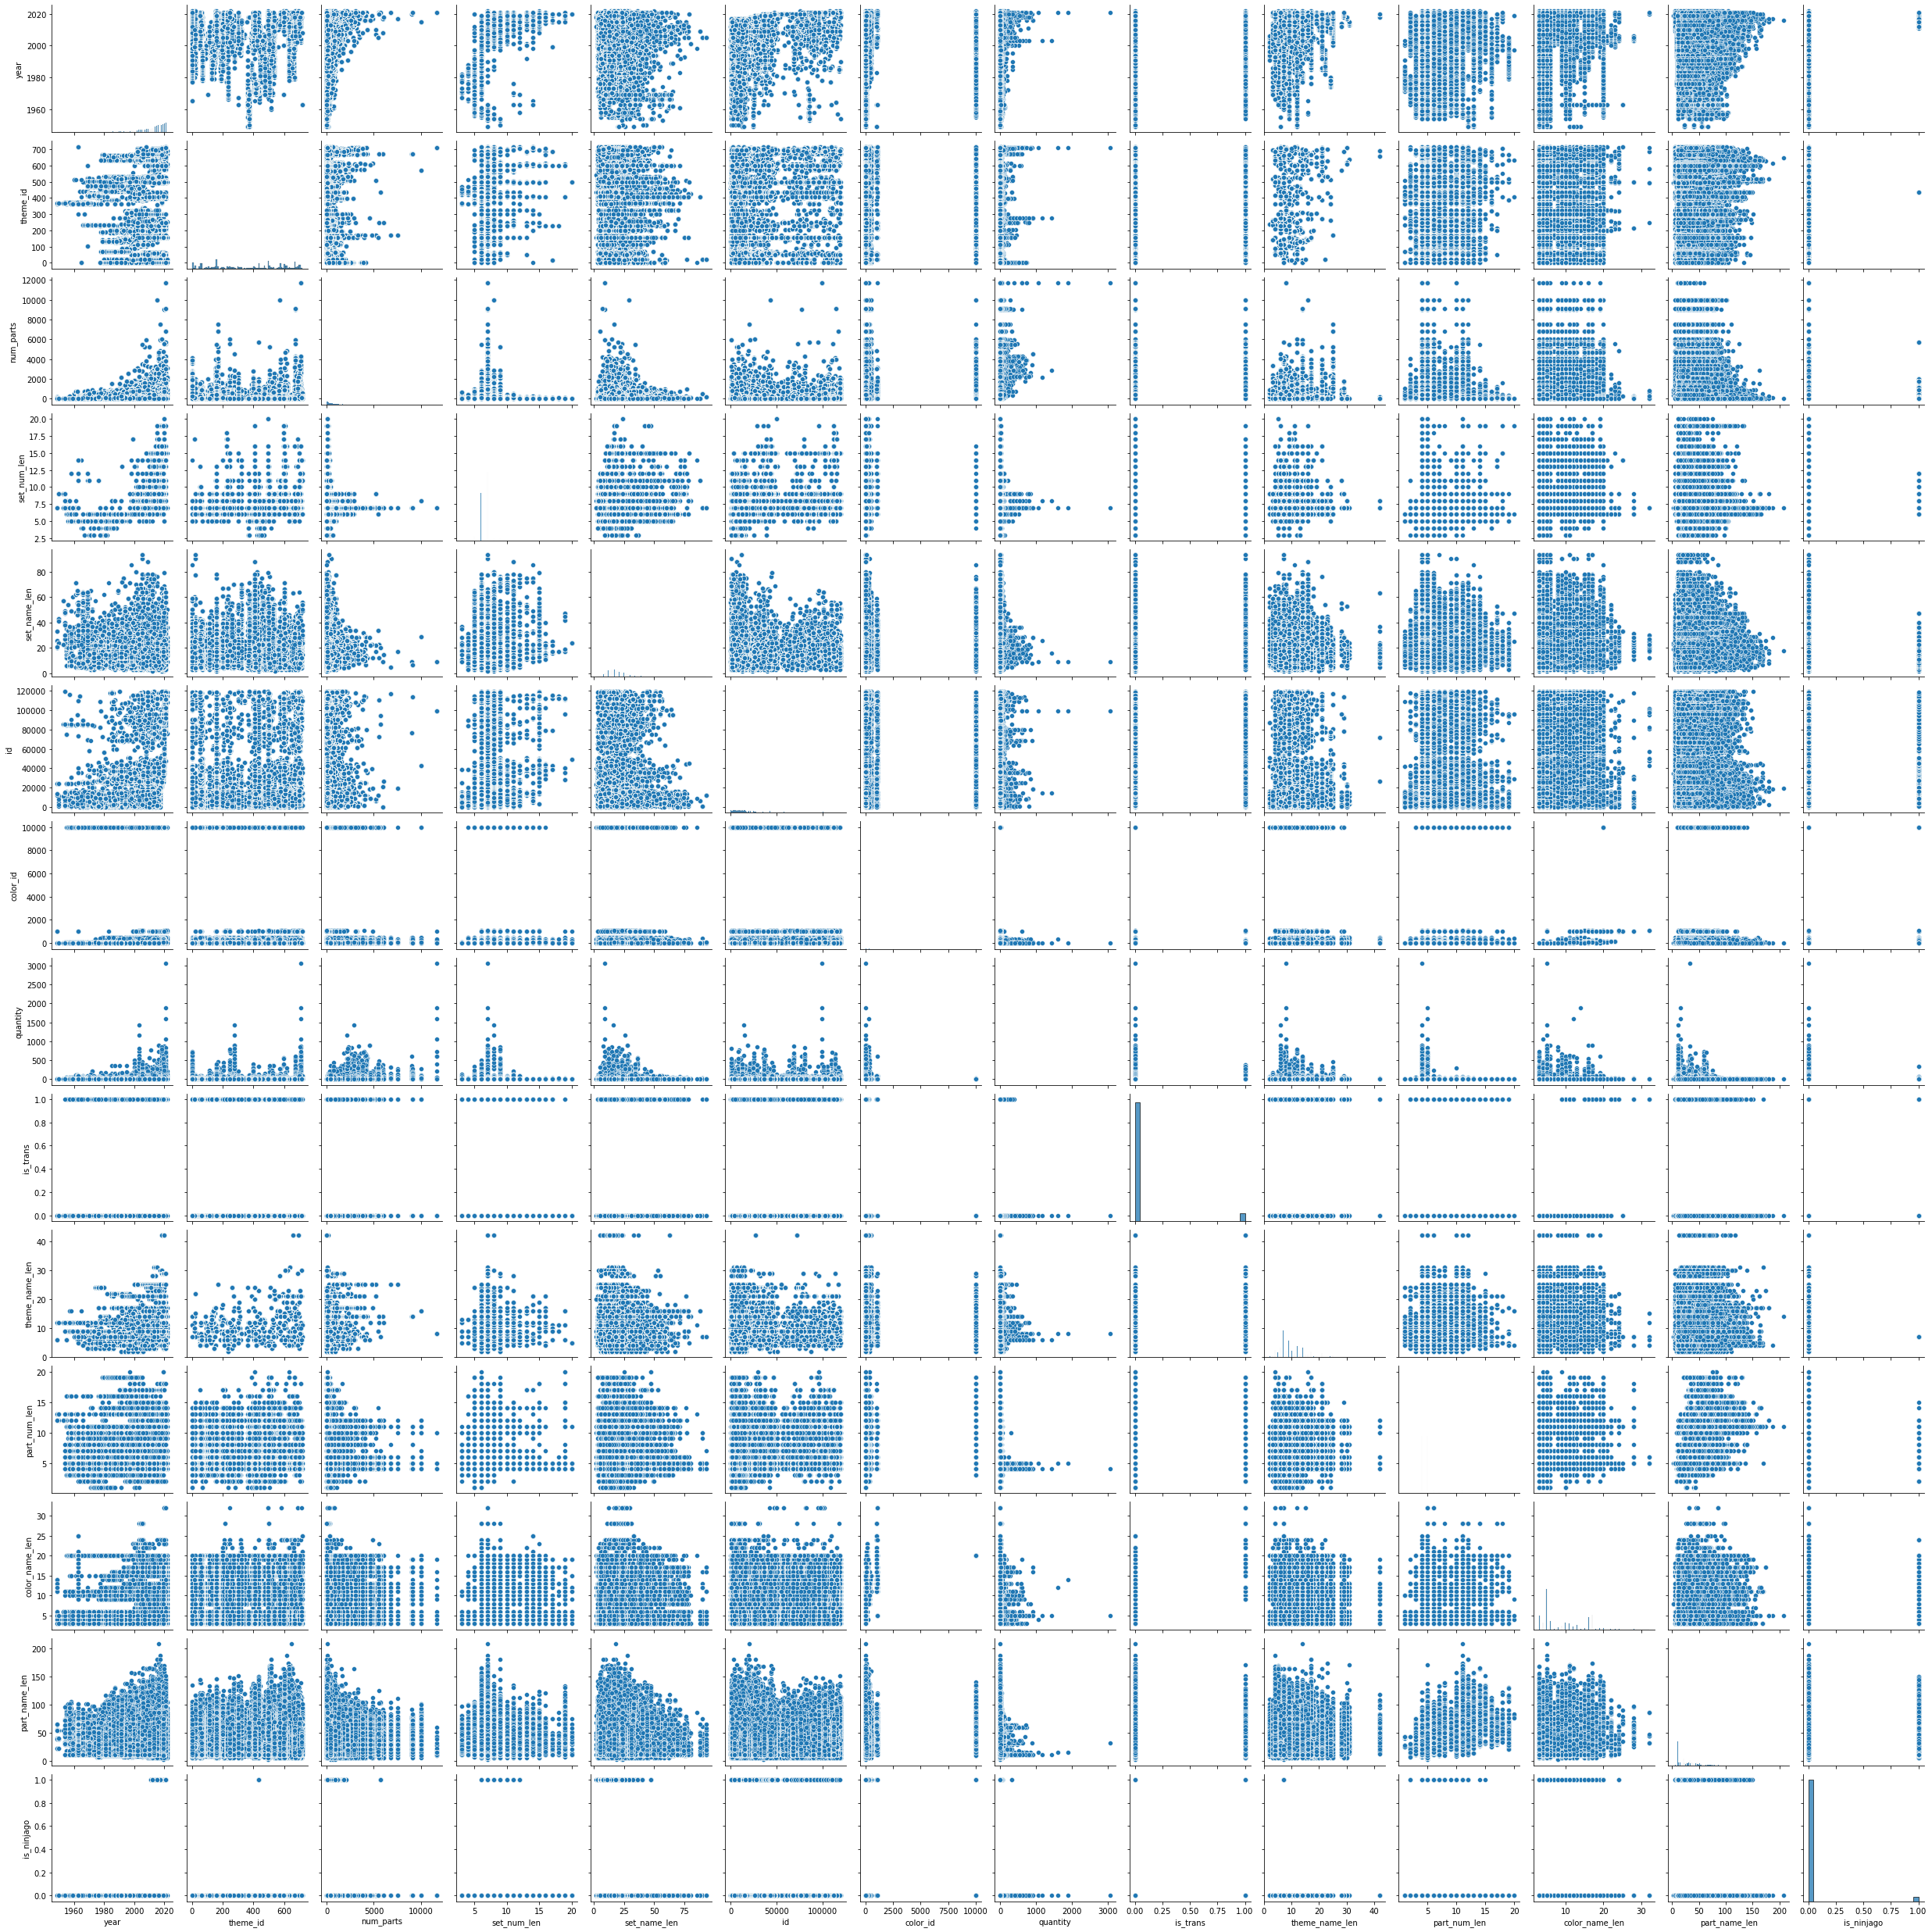

In [17]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

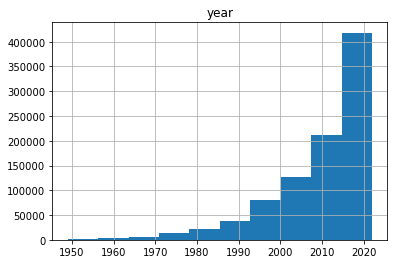

In [18]:
df.hist(column='year')

In [19]:
df['num_parts'].max()

11695

In [1]:
df.hist(column='num_parts', bins=range(0, 6000, 100))

NameError: name 'df' is not defined

In [21]:
df.head(1)

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0


In [22]:
df_1 = df[df['is_ninjago']==1]

In [23]:
df_0 = df[df['is_ninjago']==0]

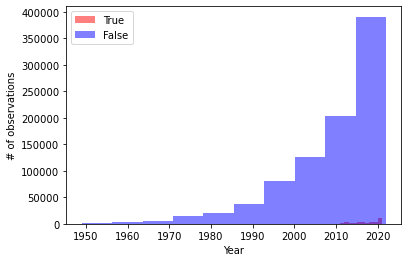

In [24]:
fig, ax = plt.subplots()
ax.hist(df_1['year'], label='True', color='red', alpha=0.5)
ax.hist(df_0['year'], label='False', color='blue', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

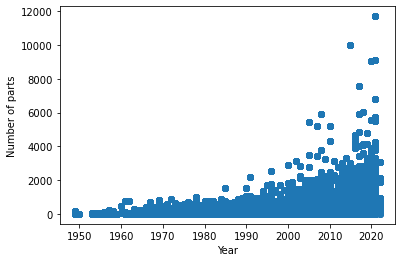

In [25]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['num_parts'])

ax.set_xlabel('Year')
ax.set_ylabel('Number of parts')
plt.show()

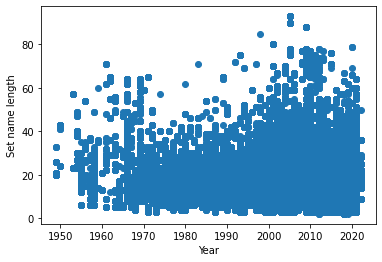

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['set_name_len'])
ax.set_xlabel('Year')
ax.set_ylabel('Set name length')
plt.show()

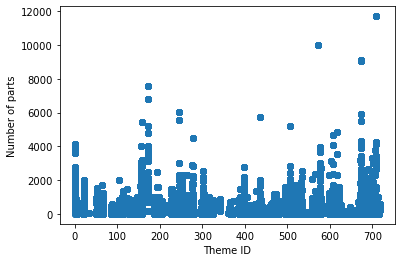

In [27]:
fig, ax = plt.subplots()
ax.scatter(df['theme_id'], df['num_parts'])
ax.set_xlabel('Theme ID')
ax.set_ylabel('Number of parts')
plt.show()

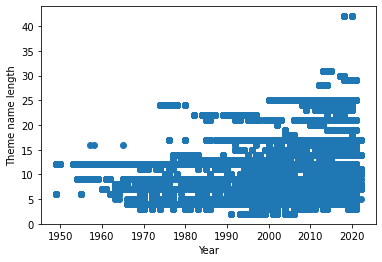

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['theme_name_len'])
ax.set_xlabel('Year')
ax.set_ylabel('Theme name length')
plt.show()